In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta

In [2]:
#Machine learning tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from scipy import sparse
from sklearn import preprocessing

In [3]:
import gc
import time
import warnings
import os


In [4]:
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import math

In [5]:
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls

In [6]:
# Keras for deep learning
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.


In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
wm_train = pd.read_csv('../Resources/train.csv')
wm_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
wm_test = pd.read_csv('../Resources/test.csv')
wm_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [10]:
# wm_test["Date"] = pd.to_datetime(wm_test["Date"])

In [11]:
wm_test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [12]:
wm_train['Split'] = 'Train'
wm_test['Split'] = 'Test'

In [13]:
t_len = len(wm_train) # Get number of training examples
wm_df = pd.concat([wm_train,wm_test],axis=0) # Join train and test
wm_df.tail()

C:\Users\Shubha\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Date,Dept,IsHoliday,Split,Store,Weekly_Sales
115059,2013-06-28,98,False,Test,45,NaN
115060,2013-07-05,98,False,Test,45,NaN
115061,2013-07-12,98,False,Test,45,NaN
115062,2013-07-19,98,False,Test,45,NaN
115063,2013-07-26,98,False,Test,45,NaN


In [14]:
wm_df.describe()

,Dept,Store,Weekly_Sales
count,536634.000000,536634.000000,421570.000000
mean,44.277301,22.208621,15981.258123
std,30.527358,12.790580,22711.183519
min,1.000000,1.000000,-4988.940000
25%,18.000000,11.000000,2079.650000
50%,37.000000,22.000000,7612.030000
75%,74.000000,33.000000,20205.852500
max,99.000000,45.000000,693099.360000


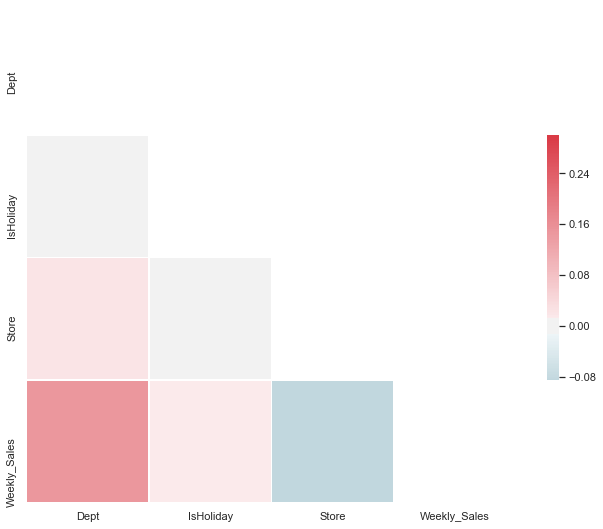

In [15]:
sns.set(style="white")

# Compute the correlation matrix
corr = wm_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
wm_df.loc[wm_df['Weekly_Sales'] >300000]

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales
30474,2011-12-23,7,False,Train,4,318422.01
37201,2010-11-26,72,True,Train,4,381072.11
37253,2011-11-25,72,True,Train,4,385051.04
56417,2010-11-26,72,True,Train,6,342578.65
56469,2011-11-25,72,True,Train,6,326866.60
88428,2010-12-24,7,False,Train,10,406988.63
88480,2011-12-23,7,False,Train,10,341308.00
95373,2010-11-26,72,True,Train,10,693099.36
95377,2010-12-24,72,False,Train,10,404245.03
95425,2011-11-25,72,True,Train,10,630999.19


In [17]:
wm_df.loc[wm_df['Weekly_Sales'] >240000,"Date"].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2011-08-26     1
2010-02-05     1
Name: Date, dtype: int64

In [18]:
wm_df.isnull().sum()

Date                 0
Dept                 0
IsHoliday            0
Split                0
Store                0
Weekly_Sales    115064
dtype: int64

In [19]:
wm_df.fillna(0, inplace=True)

In [20]:
wm_df['Store'] = 'Store_' + wm_df['Store'].map(str)
wm_df['Dept'] = 'Dept_' + wm_df['Dept'].map(str)
wm_df['IsHoliday'] = 'IsHoliday_' + wm_df['IsHoliday'].map(str)

In [21]:
# Create dummies
store_dummies = pd.get_dummies(wm_df['Store'])
dept_dummies = pd.get_dummies(wm_df['Dept'])
holiday_dummies = pd.get_dummies(wm_df['IsHoliday'])

In [22]:
# create 12 dummy variables, one for each month
wm_df['DateType'] = [dt.strptime(date, '%Y-%m-%d').date() for date in wm_df['Date'].astype(str).values.tolist()]
wm_df['Month'] = [date.month for date in wm_df['DateType']]
wm_df['Month'] = 'Month_' + wm_df['Month'].map(str)
Month_dummies = pd.get_dummies(wm_df['Month'] )

In [23]:
wm_df['Black_Friday'] = np.where((wm_df['DateType']==dt(2010, 11, 26).date()) | (wm_df['DateType']==dt(2011, 11, 25).date()), 'yes', 'no')
wm_df['Pre_christmas'] = np.where((wm_df['DateType']==dt(2010, 12, 23).date()) | (wm_df['DateType']==dt(2010, 12, 24).date()) | (wm_df['DateType']==dt(2011, 12, 23).date()) | (wm_df['DateType']==dt(2011, 12, 24).date()), 'yes', 'no')
wm_df['Black_Friday'] = 'Black_Friday_' + wm_df['Black_Friday'].map(str)
wm_df['Pre_christmas'] = 'Pre_christmas_' + wm_df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(wm_df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(wm_df['Pre_christmas'] )

In [24]:
# Add dummies
wm_df = pd.concat([wm_df,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)

In [25]:
# Get dataframe with averages per store and department
medians = pd.DataFrame({'Median Sales' :wm_df.loc[wm_df['Split']=='Train'].groupby(by=['Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians.head()

,Dept,Store,Month,IsHoliday,Median Sales
0,Dept_1,Store_1,Month_1,IsHoliday_False,17350.585
1,Dept_1,Store_1,Month_10,IsHoliday_False,23388.030
2,Dept_1,Store_1,Month_11,IsHoliday_False,19551.115
3,Dept_1,Store_1,Month_11,IsHoliday_True,19865.770
4,Dept_1,Store_1,Month_12,IsHoliday_False,39109.390


In [26]:
# Merge by store, department and month
wm_df = wm_df.merge(medians, how = 'outer', on = ['Dept','Store','Month','IsHoliday'])

In [27]:
# Fill NA
wm_df['Median Sales'].fillna(wm_df['Median Sales'].loc[wm_df['Split']=='Train'].median(), inplace=True) 

# Create a key for easy access

wm_df['Key'] = wm_df['Dept'].map(str)+wm_df['Store'].map(str)+wm_df['Date'].map(str)+wm_df['IsHoliday'].map(str)

In [28]:
wm_df.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,DateType,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key
0,2010-02-05,Dept_1,IsHoliday_False,Train,Store_1,24924.50,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12010-02-05IsHoliday_False
1,2010-02-19,Dept_1,IsHoliday_False,Train,Store_1,41595.55,2010-02-19,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12010-02-19IsHoliday_False
2,2010-02-26,Dept_1,IsHoliday_False,Train,Store_1,19403.54,2010-02-26,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12010-02-26IsHoliday_False
3,2011-02-04,Dept_1,IsHoliday_False,Train,Store_1,21665.76,2011-02-04,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12011-02-04IsHoliday_False
4,2011-02-18,Dept_1,IsHoliday_False,Train,Store_1,46845.87,2011-02-18,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12011-02-18IsHoliday_False


In [29]:
# Attach variable of last weeks time/ Storing last week value
wm_df['DateLagged'] = wm_df['DateType']- timedelta(days=7)
wm_df.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,DateType,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged
0,2010-02-05,Dept_1,IsHoliday_False,Train,Store_1,24924.50,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12010-02-05IsHoliday_False,2010-01-29
1,2010-02-19,Dept_1,IsHoliday_False,Train,Store_1,41595.55,2010-02-19,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12010-02-19IsHoliday_False,2010-02-12
2,2010-02-26,Dept_1,IsHoliday_False,Train,Store_1,19403.54,2010-02-26,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12010-02-26IsHoliday_False,2010-02-19
3,2011-02-04,Dept_1,IsHoliday_False,Train,Store_1,21665.76,2011-02-04,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12011-02-04IsHoliday_False,2011-01-28
4,2011-02-18,Dept_1,IsHoliday_False,Train,Store_1,46845.87,2011-02-18,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Dept_1Store_12011-02-18IsHoliday_False,2011-02-11


In [30]:
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_df = wm_df.sort_values(['Store', 'Dept','DateType'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True)

In [31]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=wm_df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['DateType']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

C:\Users\Shubha\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\Shubha\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\Shubha\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\Shubha\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [32]:
sorted_df[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales
0,Dept_1,Store_1,2010-02-05,23510.49,24924.50,23510.49
1,Dept_1,Store_1,2010-02-12,24924.50,46039.49,37887.17
2,Dept_1,Store_1,2010-02-19,46039.49,41595.55,23510.49
3,Dept_1,Store_1,2010-02-26,41595.55,19403.54,23510.49
4,Dept_1,Store_1,2010-03-05,19403.54,21827.90,21280.40


In [33]:
# Merge by store and department
wm_df = wm_df.merge(sorted_df[['Dept', 'Store','DateType','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','DateType'])

In [34]:
wm_df['Sales_dif'] = wm_df['Median Sales'] - wm_df['LaggedSales']
wm_df[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales
0,Dept_1,Store_1,2010-02-05,23510.49,24924.50,23510.49
1,Dept_1,Store_1,2010-02-19,46039.49,41595.55,23510.49
2,Dept_1,Store_1,2010-02-26,41595.55,19403.54,23510.49
3,Dept_1,Store_1,2011-02-04,18461.18,21665.76,23510.49
4,Dept_1,Store_1,2011-02-18,37887.17,46845.87,23510.49


In [35]:
# Remove redundant items
switch= 1

if(switch):
    df_backup = wm_df
else:
    wm_df=df_backup
    display(df_backup.head())

In [36]:
wm_df['Difference'] = wm_df['Median Sales'] - wm_df['Weekly_Sales']
wm_df.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,DateType,Month,Black_Friday,Pre_christmas,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,2010-02-05,Dept_1,IsHoliday_False,Train,Store_1,24924.50,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12010-02-05IsHoliday_False,2010-01-29,23510.49,0.0,0.00,-1414.01
1,2010-02-19,Dept_1,IsHoliday_False,Train,Store_1,41595.55,2010-02-19,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12010-02-19IsHoliday_False,2010-02-12,46039.49,1.0,-22529.00,-18085.06
2,2010-02-26,Dept_1,IsHoliday_False,Train,Store_1,19403.54,2010-02-26,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12010-02-26IsHoliday_False,2010-02-19,41595.55,1.0,-18085.06,4106.95
3,2011-02-04,Dept_1,IsHoliday_False,Train,Store_1,21665.76,2011-02-04,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12011-02-04IsHoliday_False,2011-01-28,18461.18,1.0,5049.31,1844.73
4,2011-02-18,Dept_1,IsHoliday_False,Train,Store_1,46845.87,2011-02-18,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12011-02-18IsHoliday_False,2011-02-11,37887.17,1.0,-14376.68,-23335.38


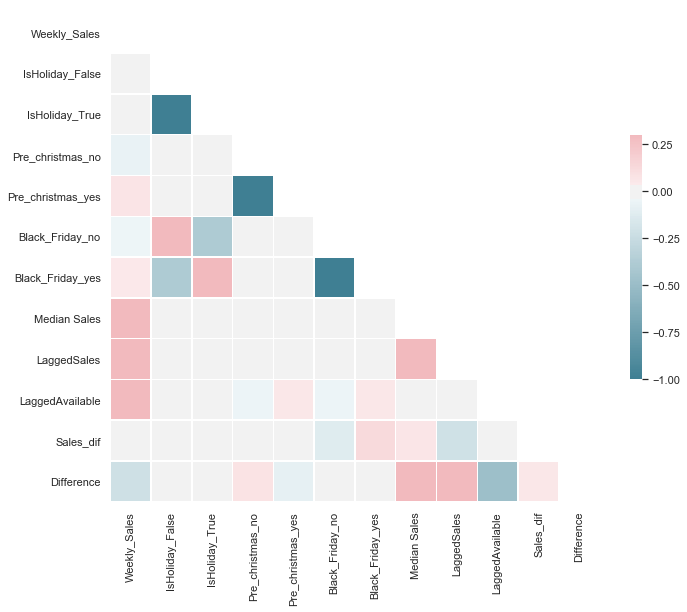

In [37]:
sns.set(style="white")

# Compute the correlation matrix
corr = wm_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
selector = [
    #'Month',
    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'LaggedSales',
    'Sales_dif',
    'LaggedAvailable'
    ]
display(wm_df[selector].describe())
display(wm_df[selector].head())

,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
count,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000
mean,0.928091,0.071909,0.988851,0.011149,0.988896,0.011104,15969.738804,-195.362035,0.773412
std,0.258338,0.258338,0.104999,0.104999,0.104791,0.104791,22689.394444,6003.550792,0.418624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1750.000000,-540263.085000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2102.872500,-302.140000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,7608.320000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20182.661250,279.820000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,693099.360000,579251.325000,1.000000


,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
0,1,0,1,0,1,0,23510.49,0.00,0.0
1,1,0,1,0,1,0,46039.49,-22529.00,1.0
2,1,0,1,0,1,0,41595.55,-18085.06,1.0
3,1,0,1,0,1,0,18461.18,5049.31,1.0
4,1,0,1,0,1,0,37887.17,-14376.68,1.0


In [39]:
train = wm_df.loc[wm_df['Split']=='Train']
test = wm_df.loc[wm_df['Split']=='Test']
test.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,DateType,Month,Black_Friday,Pre_christmas,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
9,2013-02-01,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-02-01,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12013-02-01IsHoliday_False,2013-01-25,23510.49,0.0,0.0,23510.49
10,2013-02-15,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-02-15,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12013-02-15IsHoliday_False,2013-02-08,23510.49,0.0,0.0,23510.49
11,2013-02-22,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-02-22,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,23510.49,Dept_1Store_12013-02-22IsHoliday_False,2013-02-15,23510.49,0.0,0.0,23510.49
15,2013-02-08,Dept_1,IsHoliday_True,Test,Store_1,0.0,2013-02-08,Month_2,Black_Friday_no,Pre_christmas_no,...,0,1,0,37887.17,Dept_1Store_12013-02-08IsHoliday_True,2013-02-01,37887.17,0.0,0.0,37887.17
29,2013-03-01,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-03-01,Month_3,Black_Friday_no,Pre_christmas_no,...,0,1,0,21280.40,Dept_1Store_12013-03-01IsHoliday_False,2013-02-22,21280.40,0.0,0.0,21280.40


In [40]:
# Set seed for reproducability 
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_dev, y_train, y_dev = train_test_split(train[selector], train['Difference'], test_size=0.2, random_state=42)
print(X_dev.shape)
print(y_dev.shape)

(84314, 9)
(84314,)


In [41]:
neural = False
if neural:
    # Sequential model
    
    adam_regularized = Sequential()

    # First hidden layer now regularized
    adam_regularized.add(Dense(32,activation='relu',
                    input_dim=X_train.shape[1],
                    kernel_regularizer = regularizers.l2(0.01)))

    # Second hidden layer now regularized
    adam_regularized.add(Dense(16,activation='relu',
                       kernel_regularizer = regularizers.l2(0.01)))

    # Output layer stayed sigmoid
    adam_regularized.add(Dense(1,activation='linear'))

    # Setup adam optimizer
    adam_optimizer=keras.optimizers.Adam(lr=0.01,
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08)

    # Compile the model
    adam_regularized.compile(optimizer=adam_optimizer,
                  loss='mean_absolute_error',
                  metrics=['acc'])

# Train
    history_adam_regularized=adam_regularized.fit(X_train, y_train, # Train on training set
                                 epochs=10, # We will train over 1,000 epochs
                                 batch_size=2048, # Batch size 
                                 verbose=0) # Suppress Keras output
    adam_regularized.evaluate(x=X_dev,y=y_dev)

    # Plot network
    plt.plot(history_adam_regularized.history['loss'], label='Adam Regularized')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    y_pred_neural = adam_regularized.predict(X_dev)

In [42]:
#Random forest model specification
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   52.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [43]:
y_pred_random = regr.predict(X_dev)

y_dev = y_dev.to_frame()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished


In [44]:
y_dev.values

array([[ 377.53 ],
       [   0.   ],
       [-112.075],
       ...,
       [1029.73 ],
       [-227.46 ],
       [   0.   ]])

In [45]:
# Transform forest predictions to observe direction of change


direction_true1= binary(y_dev.values)
direction_predict = binary(y_pred_random)

## show confusion matrix random forest
cnf_matrix = confusion_matrix(direction_true1, direction_predict)

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.blues, annot=True)
#ax.set_xticklabels(abbreviation)
#ax.set_yticklabels(abbreviation)
plt.title('Confusion matrix of random forest predictions')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show();

NameError: name 'binary' is not defined

In [57]:
y_dev['Predicted'] = y_pred_random
df_out = pd.merge(train,y_dev[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,DateType,Month,Black_Friday,Pre_christmas,...,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,Predicted
2,2010-02-26,Dept_1,IsHoliday_False,Train,Store_1,19403.54,2010-02-26,Month_2,Black_Friday_no,Pre_christmas_no,...,1,0,23510.490,Dept_1Store_12010-02-26IsHoliday_False,2010-02-19,41595.550,1.0,-18085.060,4106.950,-6298.66775
7,2012-02-17,Dept_1,IsHoliday_False,Train,Store_1,54060.10,2012-02-17,Month_2,Black_Friday_no,Pre_christmas_no,...,1,0,23510.490,Dept_1Store_12012-02-17IsHoliday_False,2012-02-10,36988.490,1.0,-13478.000,-30549.610,-1082.88200
14,2012-02-10,Dept_1,IsHoliday_True,Train,Store_1,36988.49,2012-02-10,Month_2,Black_Friday_no,Pre_christmas_no,...,1,0,37887.170,Dept_1Store_12012-02-10IsHoliday_True,2012-02-03,23510.490,1.0,14376.680,898.680,-55.39200
28,2012-03-30,Dept_1,IsHoliday_False,Train,Store_1,28952.86,2012-03-30,Month_3,Black_Friday_no,Pre_christmas_no,...,1,0,21280.400,Dept_1Store_12012-03-30IsHoliday_False,2012-03-23,22107.700,1.0,-827.300,-7672.460,-1916.28000
39,2011-04-01,Dept_1,IsHoliday_False,Train,Store_1,20398.09,2011-04-01,Month_4,Black_Friday_no,Pre_christmas_no,...,1,0,26318.080,Dept_1Store_12011-04-01IsHoliday_False,2011-03-25,20881.100,1.0,5436.980,5919.990,2160.08400
72,2010-06-25,Dept_1,IsHoliday_False,Train,Store_1,16328.72,2010-06-25,Month_6,Black_Friday_no,Pre_christmas_no,...,1,0,16328.720,Dept_1Store_12010-06-25IsHoliday_False,2010-06-18,16216.270,1.0,112.450,0.000,-840.41050
98,2012-07-20,Dept_1,IsHoliday_False,Train,Store_1,16348.06,2012-07-20,Month_7,Black_Friday_no,Pre_christmas_no,...,1,0,16035.640,Dept_1Store_12012-07-20IsHoliday_False,2012-07-13,16566.180,1.0,-530.540,-312.420,-748.01525
107,2010-08-27,Dept_1,IsHoliday_False,Train,Store_1,15793.87,2010-08-27,Month_8,Black_Friday_no,Pre_christmas_no,...,1,0,15793.870,Dept_1Store_12010-08-27IsHoliday_False,2010-08-20,15740.130,1.0,53.740,0.000,-503.68025
109,2011-08-12,Dept_1,IsHoliday_False,Train,Store_1,14539.79,2011-08-12,Month_8,Black_Friday_no,Pre_christmas_no,...,1,0,15793.870,Dept_1Store_12011-08-12IsHoliday_False,2011-08-05,15295.550,1.0,498.320,1254.080,175.87025
111,2011-08-26,Dept_1,IsHoliday_False,Train,Store_1,14537.37,2011-08-26,Month_8,Black_Friday_no,Pre_christmas_no,...,1,0,15793.870,Dept_1Store_12011-08-26IsHoliday_False,2011-08-19,14689.240,1.0,1104.630,1256.500,302.08825


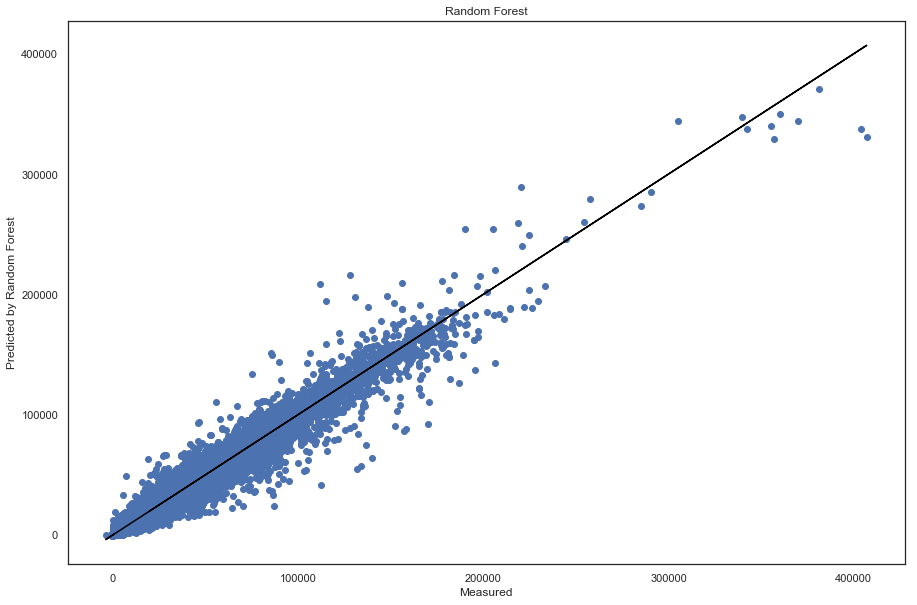

In [66]:
# !conda install scikitplot
# !conda update scikitplot
# import scikitplot as skplt
plt.figure(figsize=(15,10)) 
df_out['prediction'] = df_out['Median Sales']-df_out['Predicted']
plt.scatter(df_out['Weekly_Sales'],df_out['prediction'])
plt.plot(df_out["Weekly_Sales"],df_out["Weekly_Sales"],"black")
plt.title("Random Forest")
plt.xlabel("Measured")
plt.ylabel("Predicted by Random Forest")
plt.savefig("../Output/random_forest_regration_1.png")
plt.show()


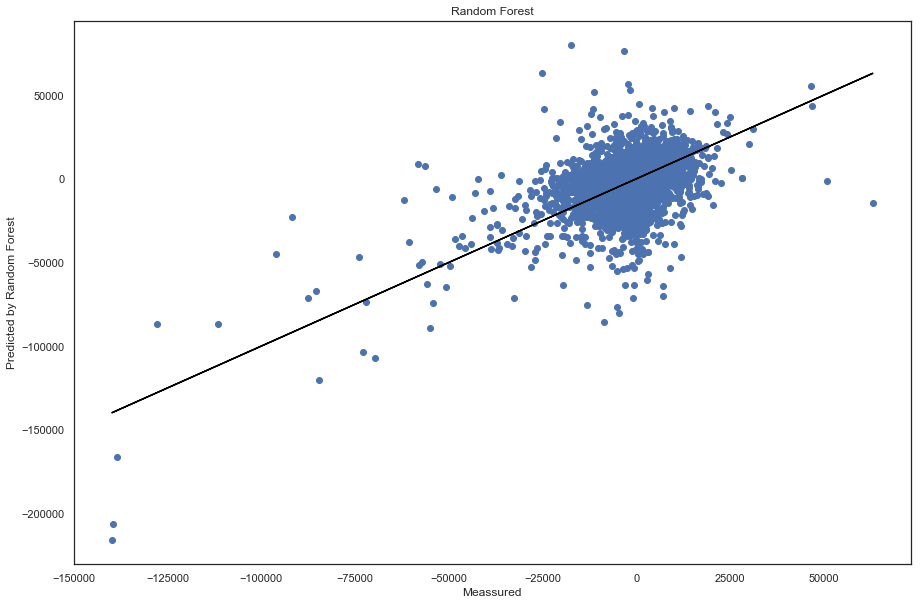

In [65]:
plt.figure(figsize=(15,10)) 
plt.scatter(y_pred_random,y_dev['Difference'].values)
plt.plot(y_pred_random,y_pred_random,"black")
plt.title("Random Forest")
plt.xlabel("Meassured")
plt.ylabel("Predicted by Random Forest")
plt.savefig("../Output/random_forest_regration_2.png")
plt.show()

In [51]:
print("Medians: "+str(sum(abs(df_out['Difference']))/df_out.shape[0]))
print("Random Forest: "+str(sum(abs(df_out['Weekly_Sales']-df_out['prediction']))/df_out.shape[0]))

Medians: 1545.7406070759305
Random Forest: 1607.5281893586389


In [58]:
#Random forest model specification. Set n_estimators lower for faster performance
rf_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=0)

#Train on data
rf_model.fit(train[selector], train['Difference'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
final_y_prediction = rf_model.predict(test[selector])

In [60]:
testfile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis=1)
testfile['prediction'] = testfile['Median Sales']-testfile[0]
testfile.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,DateType,Month,Black_Friday,Pre_christmas,...,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,0,prediction
0,2013-02-01,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-02-01,Month_2,Black_Friday_no,Pre_christmas_no,...,0,23510.49,Dept_1Store_12013-02-01IsHoliday_False,2013-01-25,23510.49,0.0,0.0,23510.49,-2591.37875,26101.86875
1,2013-02-15,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-02-15,Month_2,Black_Friday_no,Pre_christmas_no,...,0,23510.49,Dept_1Store_12013-02-15IsHoliday_False,2013-02-08,23510.49,0.0,0.0,23510.49,-2591.37875,26101.86875
2,2013-02-22,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-02-22,Month_2,Black_Friday_no,Pre_christmas_no,...,0,23510.49,Dept_1Store_12013-02-22IsHoliday_False,2013-02-15,23510.49,0.0,0.0,23510.49,-2591.37875,26101.86875
3,2013-02-08,Dept_1,IsHoliday_True,Test,Store_1,0.0,2013-02-08,Month_2,Black_Friday_no,Pre_christmas_no,...,0,37887.17,Dept_1Store_12013-02-08IsHoliday_True,2013-02-01,37887.17,0.0,0.0,37887.17,-3054.22350,40941.39350
4,2013-03-01,Dept_1,IsHoliday_False,Test,Store_1,0.0,2013-03-01,Month_3,Black_Friday_no,Pre_christmas_no,...,0,21280.40,Dept_1Store_12013-03-01IsHoliday_False,2013-02-22,21280.40,0.0,0.0,21280.40,-633.08725,21913.48725


In [61]:
final = pd.DataFrame({'id':pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Store']]).map(str) + '_' +
                           pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Dept']]).map(str)  + '_' +
                           testfile['Date'].map(str),
                          'Weekly_Sales':testfile['prediction']})
final.head()

,id,Weekly_Sales
0,1_1_2013-02-01,26101.86875
1,1_1_2013-02-15,26101.86875
2,1_1_2013-02-22,26101.86875
3,1_1_2013-02-08,40941.39350
4,1_1_2013-03-01,21913.48725


In [63]:
final.to_csv("../Output/WM_Weekly_Sales_Prediction.csv")

In [66]:
final2 = pd.DataFrame({'id':pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Store']]).map(str)  ,
                          "Dept": pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Dept']]).map(str),
                          "Date": testfile['Date'].map(str),
                          'Weekly_Sales':testfile['prediction']})
final2.head()

,id,Dept,Date,Weekly_Sales
0,1,1,2013-02-01,26101.86875
1,1,1,2013-02-15,26101.86875
2,1,1,2013-02-22,26101.86875
3,1,1,2013-02-08,40941.39350
4,1,1,2013-03-01,21913.48725


In [67]:
final2.to_csv("../Output/WM_Weekly_Sales_Prediction_final.csv")